# ECE 842 Project 2
----
- **Name**: Aman Dhruva Thamminana
- **Student ID**: 160555256
- **Email**: thammina@msu.edu

In [2]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import os

In [14]:
os.getcwd()


'c:\\sim'

In [2]:
def rename_file(new_name, old_name = 'tracefile'):
    try:
        os.rename(old_name, new_name)
        return True
    except OSError as e:
        print(f"Error: {e}")
        return False

# Expirement 1:

In [3]:
cap = 100000 # channel capacity (bps)  
psize = 800 # packet size (bytes)
qsize = 10000 # queue size (packets)

# Run simulations

for t in [10, 100, 1000, 10000]:
    cmd = f'Qsim.exe 10 p {cap} {psize*8} p {qsize} {t}' 
    subprocess.check_output(cmd, shell=True, text=True)


In [4]:
rename_file('Expirement1.txt', 'tracefile')

True

# Analysis EXP1:

In [3]:
def expirement1():

    data_list = []
    with open('Expirement1.txt', 'r') as file:
        lines = file.readlines()


        for line in lines:
            values = line.strip().split(',')
            utilization = float(values[0].split(': ')[1])
            avg_packet_delay = float(values[1].split(': ')[1])
            num_packet_in_system = float(values[2].split(': ')[1])
            packet_drop_rate = float(values[3].split(': ')[1])
            
            data_list.append([utilization, avg_packet_delay, num_packet_in_system, packet_drop_rate])


    df = pd.DataFrame(data_list, columns=['Utilization', 'Average Packet Delay', '# of packet in system', 'Packet Drop Rate'])

    return df


$\lambda = \text{arrival rate per unit time}$

$\mu = \text{service rate per unit time}$

$\rho = \frac{\lambda}{\mu} = \frac{10 \frac{packets}{sec} *6400 \text{bits}}{100,000 \text{bits per second}} = 0.64$



$N = \frac{\rho}{1-\rho} = \frac{0.64}{(1-0.64)} = 1.777$

$W = \frac{1}{\mu - \lambda} = \frac{1}{100,000 - 10*6400} = 0.000027$

In [5]:
exp1_df = expirement1()
# remove idex Packet Drop Rate
if 'Packet Drop Rate' in exp1_df.columns:
    exp1_df = exp1_df.drop(columns=['Packet Drop Rate'])

exp1_df.index = [10, 100, 1000, 10000]

# rename columns
exp1_df.columns = ['Utilization', 'Delay', 'Population']
# reorder columns
exp1_df = exp1_df[['Utilization', 'Population', 'Delay']]

# Theoretical values
# exp1_df.loc['Theoretical'] = [0.64, 1.777, 0.1779]
exp1_df.loc['Theoretical'] = [0.64, 1.777, 0.000027]


# reorder rows so that theoretical is at the top
exp1_df = exp1_df.reindex(['Theoretical', 10, 100, 1000, 10000])

exp1_df




,Utilization,Population,Delay
Theoretical,0.6400,1.777000,0.000027
10,0.5477,0.760148,0.090234
100,0.6195,1.143079,0.118346
1000,0.6280,1.158088,0.118047
10000,0.6392,1.190680,0.119213


# Expirement 2:

In [8]:
# Experiment 2 parameters
cap = 100000 
psize = 800
qsize = 10000
times = 10000

# Run simulations
arr_rates = [1, 4, 7, 10, 13, 15]

In [ ]:
for rate in arr_rates:
    cmd = f'Qsim.exe {rate} p {cap} {psize*8} p {qsize} {times}'
    subprocess.check_output(cmd, shell=True, text=True)

In [17]:
rename_file('Expirement2.txt', 'tracefile')

True

In [9]:
def expirement2():
    data_list = []
    with open('Expirement2.txt', 'r') as file:
        lines = file.readlines()

        for line in lines:
            values = line.strip().split(',')
            utilization = float(values[0].split(': ')[1])
            avg_packet_delay = float(values[1].split(': ')[1])
            num_packet_in_system = float(values[2].split(': ')[1])
            packet_drop_rate = float(values[3].split(': ')[1])
            
            data_list.append([utilization, avg_packet_delay, num_packet_in_system, packet_drop_rate])


    df = pd.DataFrame(data_list, columns=['Utilization', 'Average Packet Delay', 'Population', 'Packet Drop Rate'])

    return df

In [10]:
expirement2_df = expirement2()
expirement2_df.index = arr_rates


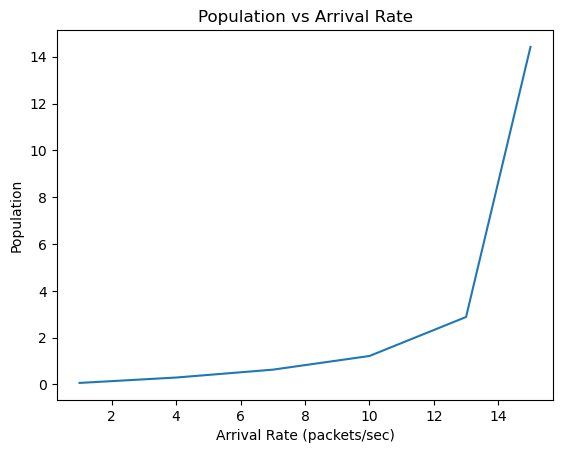

In [12]:
plt.plot(expirement2_df.index, expirement2_df['Population'])
plt.xlabel('Arrival Rate (packets/sec)')
plt.ylabel('Population')
plt.title('Population vs Arrival Rate')

plt.show()

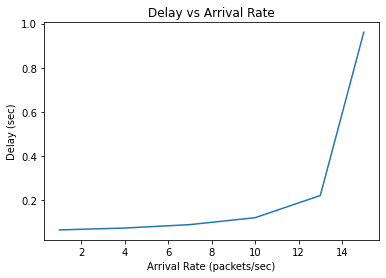

In [28]:
plt.plot(expirement2_df.index, expirement2_df['Average Packet Delay'])
plt.xlabel('Arrival Rate (packets/sec)')  
plt.ylabel('Delay (sec)')
plt.title('Delay vs Arrival Rate')
plt.show()

In [29]:
max_rate = expirement2_df[expirement2_df['Average Packet Delay'] <= 0.4].index.max()
print(f"Max rate for delay <=400ms: {max_rate}")

Max rate for delay <=400ms: 13


this conforms with the graph above

# Expirement 3: (RERUN)

In [31]:
# Experiment 3 parameters
cap = 100000
psize = 800 
qsize = 10000
times = 10000
arr_rates = [1, 4, 7, 10, 13, 15] 



!echo -------------------------Expirement3MD1------------------------- >> tracefile
# Run M/D/1/K simulations    
md1t_delays = []
for rate in arr_rates:
    cmd = f'Qsim.exe {rate} p {cap} {psize*8} c {qsize} {times}' 
    subprocess.check_output(cmd, shell=True, text=True)
    
!echo -------------------------Expirement3DM1------------------------- >> tracefile
# Run D/M/1/K simulations
dm1t_delays = []
for rate in arr_rates:
    cmd = f'Qsim.exe {rate} c {cap} {psize*8} p {qsize} {times}'
    subprocess.check_output(cmd, shell=True, text=True)


!echo -------------------------Expirement3DD1------------------------- > tracefile
mm1t_delays = []
for rate in arr_rates:
    cmd = f'Qsim.exe {rate} c {cap} {psize*8} c {qsize} {times}'
    subprocess.check_output(cmd, shell=True, text=True)


In [32]:
rename_file('Expirement3.txt', 'tracefile')

True

# Expirement 4:(RERUN)

In [33]:
# Experiment 4 parameters
cap = 100000
psize = 800
times = 10000
arr_rates = [1, 4, 7, 10, 13, 16, 19, 22, 25]

In [35]:

for k in range(1, 11):
    
    subprocess.check_output(f'echo ----------------------------- k={k} --------------------------- >> tracefile', shell=True, text=True)
    for rate in arr_rates:
        cmd = f'Qsim.exe {rate} p {cap} {psize*8} p {k} {times}' 
        subprocess.check_output(cmd, shell=True, text=True)


In [36]:
rename_file('Expirement4.txt', 'tracefile')

True